In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from model import regression
from sklearn.model_selection import train_test_split
from data_loader import load_house_attributes
from data_sources import source_choice
from processing_attributes import process_house_attributes

In [2]:
df = source_choice()

In [3]:
df_paris = load_house_attributes(df)

In [4]:
df_paris.info()

<class 'pandas.core.frame.DataFrame'>
Index: 170738 entries, 0 to 313775
Data columns (total 17 columns):
 #   Column                     Non-Null Count   Dtype         
---  ------                     --------------   -----         
 0   No disposition             170738 non-null  int32         
 1   Date mutation              170738 non-null  datetime64[ns]
 2   Nature mutation            170738 non-null  object        
 3   Valeur fonciere            170738 non-null  float64       
 4   Type de voie               170738 non-null  object        
 5   Code postal                170738 non-null  float64       
 6   Commune                    170738 non-null  object        
 7   Code departement           170738 non-null  object        
 8   Code commune               170738 non-null  int32         
 9   Section                    170738 non-null  object        
 10  Nombre de lots             170738 non-null  int32         
 11  Type local                 170738 non-null  object       

In [6]:
df_paris.describe()

,No disposition,Valeur fonciere,Code postal,Code commune,Nombre de lots,Surface reelle bati,Nombre pieces principales,year,months,day
count,170738.000000,1.707380e+05,170738.000000,170738.000000,170738.000000,170738.000000,170738.000000,170738.000000,170738.000000,170738.000000
mean,1.010173,4.606353e+05,75013.473287,113.473287,1.631371,47.856025,2.267656,2017.953355,6.659490,16.634733
std,0.204343,3.123788e+05,4.806930,4.806930,0.795478,29.771256,1.136335,1.369979,3.403966,8.884852
min,1.000000,1.001000e+03,75001.000000,101.000000,0.000000,5.000000,1.000000,2016.000000,1.000000,1.000000
25%,1.000000,2.350000e+05,75011.000000,111.000000,1.000000,27.000000,1.000000,2017.000000,4.000000,9.000000
50%,1.000000,3.800000e+05,75015.000000,115.000000,2.000000,40.000000,2.000000,2018.000000,7.000000,17.000000
75%,1.000000,6.100000e+05,75017.000000,117.000000,2.000000,62.000000,3.000000,2019.000000,10.000000,25.000000
max,24.000000,1.500000e+06,75020.000000,120.000000,19.000000,481.000000,20.000000,2020.000000,12.000000,31.000000


In [7]:
df_paris['Commune'].value_counts()

PARIS 18    19784
PARIS 15    18096
PARIS 17    14696
PARIS 11    14213
PARIS 16    13203
PARIS 20    11399
PARIS 19    10513
PARIS 12     9529
PARIS 14     9251
PARIS 10     9231
PARIS 13     8355
PARIS 09     6165
PARIS 05     4309
PARIS 07     3908
PARIS 06     3865
PARIS 03     3754
PARIS 08     3249
PARIS 02     2813
PARIS 04     2684
PARIS 01     1721
Name: Commune, dtype: int64

<Figure size 720x720 with 0 Axes>

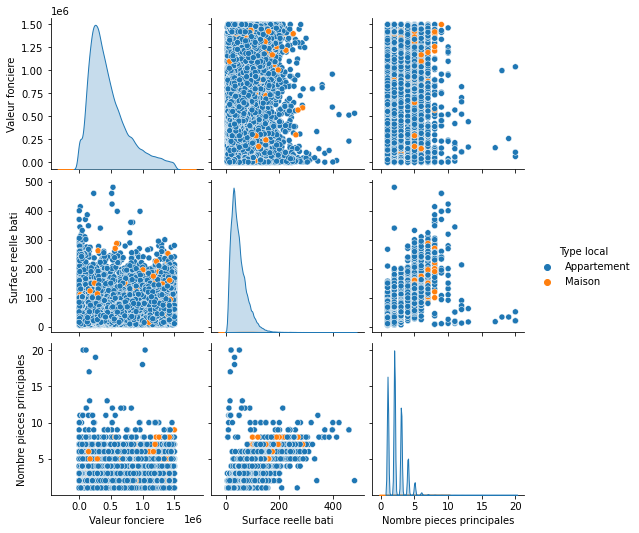

In [8]:
plt.figure(figsize=(10, 10))
sns.pairplot(df_paris[['Valeur fonciere', 'Surface reelle bati', 'Nombre pieces principales', 'Type local']],
             hue='Type local')

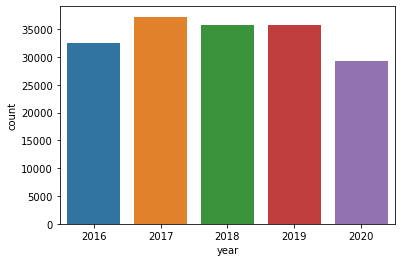

In [9]:
sns.countplot(x="year", data=df_paris)

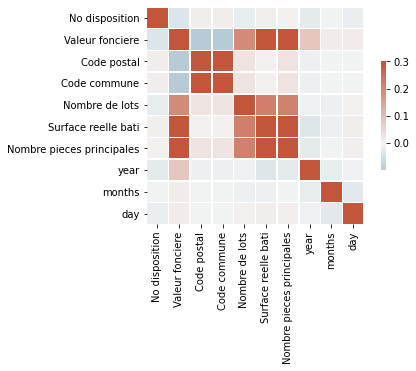

In [10]:
corr = df_paris.corr()
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [12]:
train, test = train_test_split(df_paris, test_size=0.2, random_state=42)

In [13]:
print('Training Shape:', train.shape)
print('Testing Shape:', test.shape)

Training Shape: (136590, 17)
Testing Shape: (34148, 17)


In [15]:
train_x, test_x = process_house_attributes(df_paris, train, test)

In [16]:
train_y = train["Valeur fonciere"]
test_y = test["Valeur fonciere"]

In [18]:
regr = regression(train_x, train_y)

months 3.8
day 0.0
No disposition 0.3
Nombre de lots 0.0
Surface reelle bati 0.3
Nombre pieces principales 0.1
Code postal 0.4
Type local 4.6
Section 90.4
Type de voie 0.0


In [19]:
"""Les critères les plus importants pour prédire la valeur d'un bien à Paris sont le quartier (Section) et le type de bien, la saisonnalité ou le nombre de pièce n'influencent pas le modèle"""

"Les critères les plus importants pour prédire la valeur d'un bien à Paris sont le quartier (Section) et le type de bien, la saisonnalité ou le nombre de pièce n'influencent pas le modèle"

In [19]:
prediction_regr = regr.predict(test_x)
errors_regr = abs(prediction_regr - test_y)
print('Mean Absolute Error regr:', round(np.mean(errors_regr), 2), 'euros.')

Mean Absolute Error regr: 127934.88 euros.


In [22]:
'''Notre model n'est pas performant car il n'y a pas assez de données et certaines données n'ont pas pu être correctement exploitées (Surface et nb de pièce qui sont très corrélées)'''

"Notre model n'est pas performant car il n'y a pas assez de données et certaines données n'ont pas pu être correctement exploitées (Surface et nb de pièce qui sont très corrélées)"